# Homework 1. Exploratory Data Analysis, (Prob 3)

Homework Based on Harvard CS109

All work should be your own.

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data

[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 

#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), for stats

---

In [108]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import requests
import csv

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. Download the ipython notebook, fill in and submit in blackboard.

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [100]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1)
    return X.sf(a) / Y.sf(a)

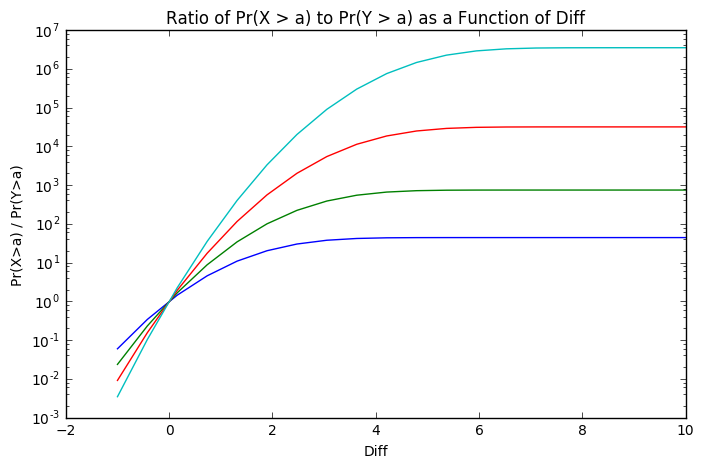

In [101]:
#your code herediffs = np.linspace(-1, +10, 20)
diff = np.linspace(-1, +10, 20)
a_values = range(2,6)

plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)

#plt.legend(.format(a) for a in a_values], loc=0);
plt.xlabel('Diff')
plt.ylabel('Pr(X>a) / Pr(Y>a)')
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff')
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? Use the year 2012. 

['ASIA', 'EUROPE', 'AFRICA', 'NORTH AMERICA', 'SOUTH AMERICA', 'OCEANIA']


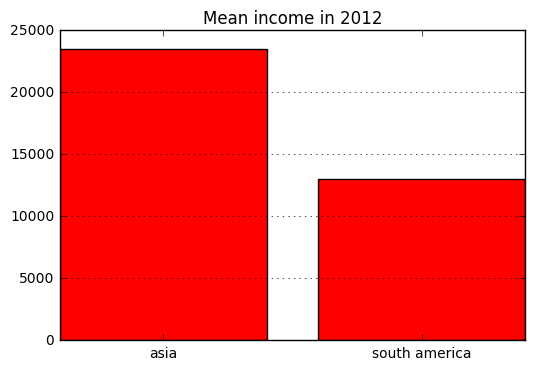

In [102]:
import xlrd
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
income = pd.read_excel('https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls')

def mergeByYear(yr):
    data1 = pd.DataFrame(transform.ix[yr].values, columns = ['Income'])
    data1['Country']=transform.columns
    total = pd.merge(data1, countries, on = ['Country'])
    total.Income = np.round(total.Income, 2)
    return total

income.index = income[income.columns[0]]
transform = income.drop(income.columns[0], axis =1)
transform.columns = map(lambda x: int(x), transform.columns)
transform = transform.T


df_2012 = mergeByYear(2012)
regions = list(df_2012.loc[:,['Region']].drop_duplicates().values[:,0])
print (regions)

def averageIncome(region, year):
    data_year = mergeByYear(year)
    data_region = data_year[data_year.Region==region]
    incomes = data_region.loc[:,['Income']]
    values = [v[0] for v in incomes.values]
    return np.mean(values)


plt.xticks([1,2], ['asia', 'south america'])
plt.bar([1,2], [averageIncome('ASIA', 2012),averageIncome('SOUTH AMERICA', 2012)], align='center', color = 'r')

plt.ylabel('')
plt.title('Mean income in 2012')
plt.gca().yaxis.grid(True)
plt.show()

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a). Use the year 2012. 

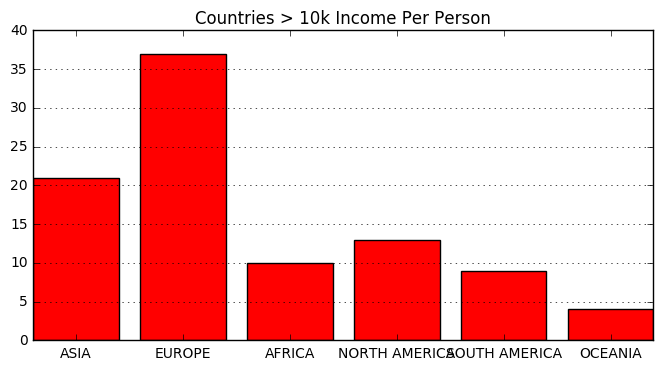

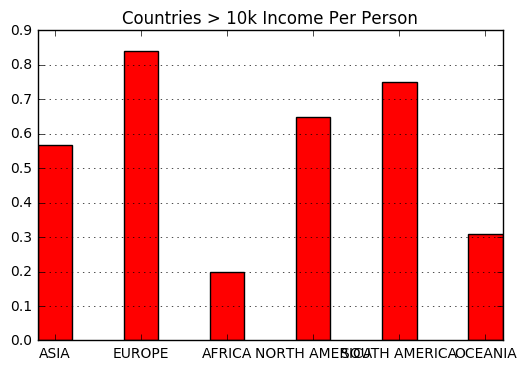

In [103]:
#your code heredef richerThanXCountriesCount(region, year, x):
def richerThanXCountriesCount(region, year, x):
    data = mergeByYear(year)
    return len(data[(data.Region==region) & (data.Income>x)])

yr = 2012
gdp = 10000
values = [richerThanXCountriesCount(region, yr, gdp) for region in regions]

plt.figure(num=None, figsize=(8, 4), dpi=300)
plt.xticks(range(len(regions)), regions)
plt.bar(range(len(regions)), values, align='center', color='r')

plt.title('Countries > 10k Income Per Person')
plt.gca().yaxis.grid(True)

plt.show()

yr = 2012
gdp = 10000
#regions = getRegions(year)
richerCountries = [richerThanXCountriesCount(region, yr, gdp) for region in regions]
totCountries = [len(mergeByYear(year)[df_2012.Region==region]) for region in regions]
richerVsTot = np.divide(richerCountries, [float(x) for x in totCountries])

plt.xticks(range(len(regions)), regions)

plt.bar(range(len(regions)), richerVsTot,    width=0.4, align='center', color='r', label='tot')
plt.title('Countries > 10k Income Per Person')
plt.gca().yaxis.grid(True)

plt.show()

#### Problem 3(d)

Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [133]:
#your code here

import requests
import zipfile
import xlrd

file = pd.read_excel("/Users/mudas/Downloads/indicatorgapminderpopulation.xlsx")
file.head(5)

population_2012 = file.loc[:,['Total population', 2012]]
population_2012.columns = ['Country', 'Population']
population_2012.head()
# i cant seem to downlaod the data from the spreadsheets


,Country,Population
0,Abkhazia,NaN
1,Afghanistan,29726803.0
2,Akrotiri and Dhekelia,NaN
3,Albania,2880667.0
4,Algeria,37439427.0


In [139]:
income_2012=mergeByYear(2012)
income_2012.head()

list([country in list(income_2012['Country'].values) for country in list(population_2012['Country'].values)]).count(True)


,Income,Country,Region,Population
0,1893.0,Afghanistan,ASIA,29726803.0
1,9811.0,Albania,EUROPE,2880667.0
2,12779.0,Algeria,AFRICA,37439427.0
3,41926.0,Andorra,EUROPE,79316.0
4,7230.0,Angola,AFRICA,22685632.0


In [140]:
join = pd.merge(income_2012, population_2012, on=['Country'], how='left')
join.head()

,Income,Country,Region,Population
0,1893.0,Afghanistan,ASIA,29726803.0
1,9811.0,Albania,EUROPE,2880667.0
2,12779.0,Algeria,AFRICA,37439427.0
3,41926.0,Andorra,EUROPE,79316.0
4,7230.0,Angola,AFRICA,22685632.0


In [152]:
join['IncomeMultiplied'] = join['Income']*join['Population']
join.head()

sum_Join = join.groupby('Region').sum()
sum_Join

,Income,Population,IncomeMultiplied
Region,,,
AFRICA,280061.0,9.851763e+08,4.802571e+12
ASIA,869516.0,4.067145e+09,3.955187e+13
EUROPE,1311187.0,6.035298e+08,1.888878e+13
NORTH AMERICA,320733.0,5.523386e+08,2.013800e+13
OCEANIA,136255.0,3.666659e+07,1.148115e+12
SOUTH AMERICA,156189.0,4.055004e+08,5.906046e+12


In [153]:
sum_Join['BalancedIncome'] = sum_Join['IncomeMultiplied'] / sum_Join['Population']
sum_Join['BalancedIncome'] = sum_Join['BalancedIncome']

sum_Join

,Income,Population,IncomeMultiplied,BalancedIncome
Region,,,,
AFRICA,280061.0,9.851763e+08,4.802571e+12,4874.834303
ASIA,869516.0,4.067145e+09,3.955187e+13,9724.724727
EUROPE,1311187.0,6.035298e+08,1.888878e+13,31297.184514
NORTH AMERICA,320733.0,5.523386e+08,2.013800e+13,36459.524638
OCEANIA,136255.0,3.666659e+07,1.148115e+12,31312.284144
SOUTH AMERICA,156189.0,4.055004e+08,5.906046e+12,14564.835293


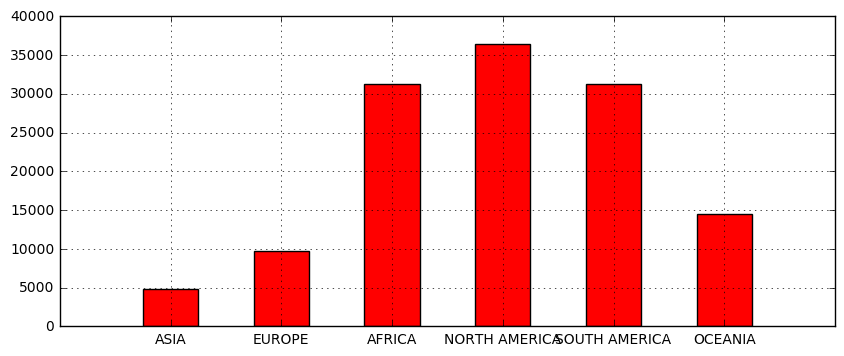

In [161]:
plt.figure(num=None, figsize=(10, 4), dpi=300)
plt.bar(range(len(sum_Join.index)), sum_Join['BalancedIncome'].values,    width=0.5, align='center', color='r')
plt.xticks(range(len(regions)), regions)
plt.grid(True)
plt.show()

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
Asias has higher average income then South America and there are also more countries with a GDP higher then #10,000. South America is doing better in terms of income and the number of countries in the region is higher then other regsions and asia.